## Challenge_Distribution

In this challenge you consider the real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's office (https://www.openintro.org/stat/data/ames.csv).

**Based on this data, perform the following tasks**:

- Take a random sample of size 50 from <code>price</code>. Using this sample, what is your best point estimate of the population mean?


- Since you have access to the population, simulate the sampling distribution for the average home price in Ames by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called <code>sample_means50</code>. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.


- Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called <code>sample_means150</code>. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?


- Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?


> Import libraries

In [309]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

> get data and parse to dataframe

In [310]:
estate_data = pd.read_csv('https://www.openintro.org/stat/data/ames.csv')

In [311]:
estate_data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


> Find column with price

In [312]:
estate_data.columns

Index(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt',
    

### Question 1

>Get population data 
> FInd population mean

In [313]:
population_sales = estate_data.SalePrice.values.tolist()
population_sales = np.array(population_sales)

In [314]:
population_sales_mean = np.mean(population_sales).round(4)
population_sales_mean

180796.0601

> Get sample data from population and find sample mean

In [315]:
def sample_gen (pop,size):
    sample_sales = []
    x = np.random.choice(a=pop, size=size)
    sample_sales.append(x)
    return sample_sales

In [316]:
sample1 = sample_gen(population_sales, 50)
sample1

[array([189000, 170000, 147000, 222000, 122000, 140200, 164900, 269500,
        116900, 203135, 157900, 332200, 125600, 192000, 171900, 133500,
        280000, 132000, 173000, 426000, 120500, 162000, 274725, 170000,
        109500, 125000, 112000, 159000, 174000, 145400, 269500, 166000,
        324000, 135000, 193000, 185000, 266000, 152500, 130000, 124000,
        372000, 203000, 158900,  96900, 164000, 123900, 201000, 110500,
        316500, 112000])]

In [317]:
sample1_mean = np.mean(sample1).round(4)
sample1_mean

184491.2

> Best Point estimate

In [318]:
best_pe = (population_sales_mean - sample1_mean).round(4)
print('Best point estimate is {}'.format(best_pe))

Best point estimate is -3695.1399


<!-- > The best point estiamte for the population mean price is 5812.2801 -->

### Question 2

In [319]:
sample_means50 = []
for i in range (5000):
    samp = np.array(sample_gen(population_sales, 50))
    samp_mean = np.mean(samp)
    sample_means50.append(samp_mean)
sample_means50= np.array(sample_means50)

In [320]:
len(sample_means50)

5000

In [321]:
sample_means50

array([183700.64, 170651.44, 166913.26, ..., 178895.64, 185523.8 ,
       185659.22])

> Plot distribution

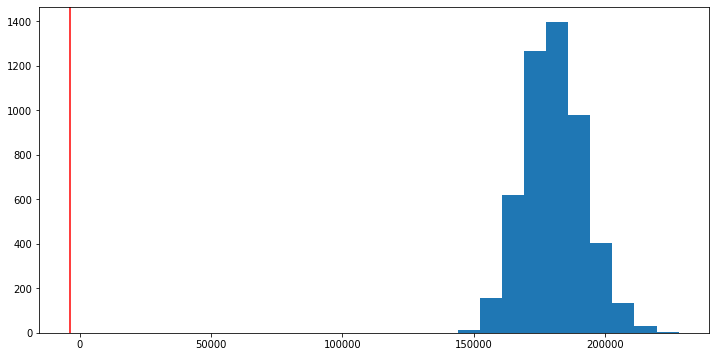

In [322]:
plt.subplots(figsize=(12,6))
plt.hist(sample_means50)
plt.axvline(best_pe, color='r')
plt.show()

> The shape of the distribution above is that of a normal distribution

In [323]:
sample_means50_mean = np.mean(sample_means50)
sample_means50_mean

180553.009428

In [324]:
print('The mean of the 5000 ssmapled distribution is {} which is not far from the population mean of {}'
      .format(sample_means50_mean,population_sales_mean ) )

The mean of the 5000 ssmapled distribution is 180553.009428 which is not far from the population mean of 180796.0601


### Question 3

In [325]:
sample_means150 = []
for i in range (5000):
    samp = np.array(sample_gen(population_sales, 150))
    samp_mean = np.mean(samp)
    sample_means150.append(samp_mean)
sample_means150= np.array(sample_means50)

In [326]:
sample_means150

array([183700.64, 170651.44, 166913.26, ..., 178895.64, 185523.8 ,
       185659.22])

> Plot distribution of 150 sized-population 

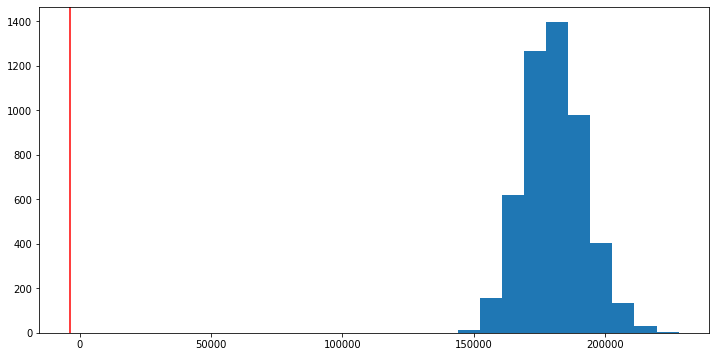

In [327]:
plt.subplots(figsize=(12,6))
plt.hist(sample_means150)
plt.axvline(best_pe, color='r')
plt.show()

> The shape pf the above distribution is similiar to that of a populaion size of 50 which is also normally distributed

In [328]:
sample_means150_mean = np.mean(sample_means150)
sample_means150_mean

180553.009428

In [329]:
sample_means150_mean - sample_means50_mean

0.0

> The mean of the sampling ditribtuion of both 50 and 150 drawn samples are the same.

> This tells us that we are closer to the ppopulation mean of 180796.0601

### Question 3

In [330]:
sample_means50_std = np.std(sample_means50)
sample_means50_std

11383.655393456265

In [331]:
sample_means150_std = np.std(sample_means50)
sample_means150_std

11383.655393456265